# Machine Learning #

## Lo que ha venido siempre la Estadística de toda la vida, que durante los 80 se llamó Inteligencia Artificial ##

* Una serie de técnicas de análisis y manipulación de datos que sirven para obtener patrones predecibles en datos reales.

* ML Supervisado

    * Los datos vienen con atributos objetivo. Queremos modelar o simplificar los datos para entender la relación entre datos y atributos y conocer mejor el problema. 
    
    * Algoritmos de regresión y clasificación.
    
* ML No supervisado

    * Queremos encontrar estructura en nuestros datos.
    
    * Clustering, estimación de densidad...

# Scikit-learn #

* http://scikit-learn.org

* Python cuenta con una serie de módulos llamados scikits.

* Scikit-learn (sklearn) es el más conocido.

* Es un toolkit bastante completo, rápido y una referencia en ML.

* [Un buen tutorial del que he sacado parte de este ejemplo](https://github.com/jakevdp/sklearn_pycon2015)

<IPython.core.display.Javascript object>


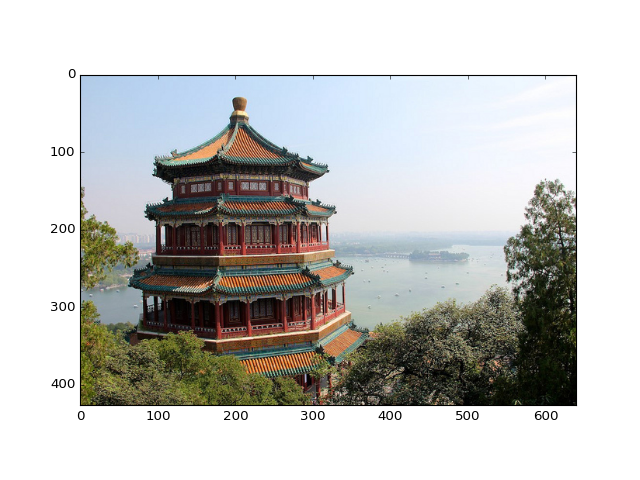

In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
fig = plt.figure(1)
ax = fig.add_subplot(1,1,1)
ax.imshow(china)

Queremos comprimir esta imagen reduciendo el número de colores de $256^3$ a 32

In [2]:
from sklearn.cluster import KMeans
iso = china.reshape(-1,3)
iso.shape

(273280, 3)

<IPython.core.display.Javascript object>


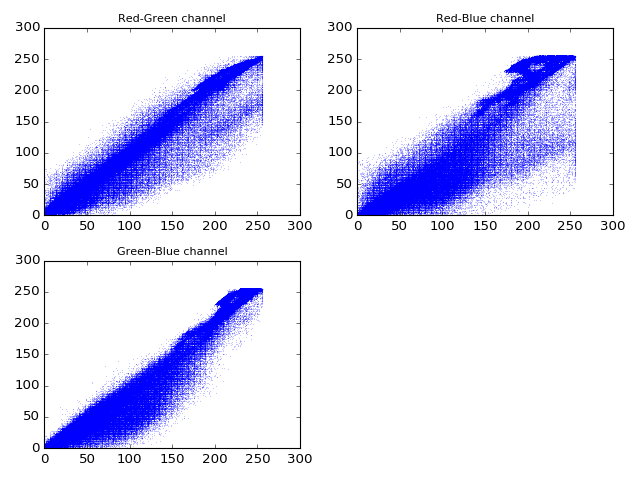

In [3]:
fig = plt.figure(2)
rg = fig.add_subplot(2,2,1)
rb = fig.add_subplot(2,2,2)
gb = fig.add_subplot(2,2,3)

rg.plot(iso[:,0], iso[:,1], 'b.', markersize=1, alpha=0.2)
rg.set_title('Red-Green channel', fontsize=10)
rb.plot(iso[:,0], iso[:,2], 'b.', markersize=1, alpha=0.2)
rb.set_title('Red-Blue channel', fontsize=10)
gb.plot(iso[:,1], iso[:,2], 'b.', markersize=1, alpha=0.2)
gb.set_title('Green-Blue channel', fontsize=10)

fig.tight_layout()

In [7]:
model = KMeans(32, n_jobs=-1)
labels = model.fit_predict(iso)
colors = model.cluster_centers_

<IPython.core.display.Javascript object>


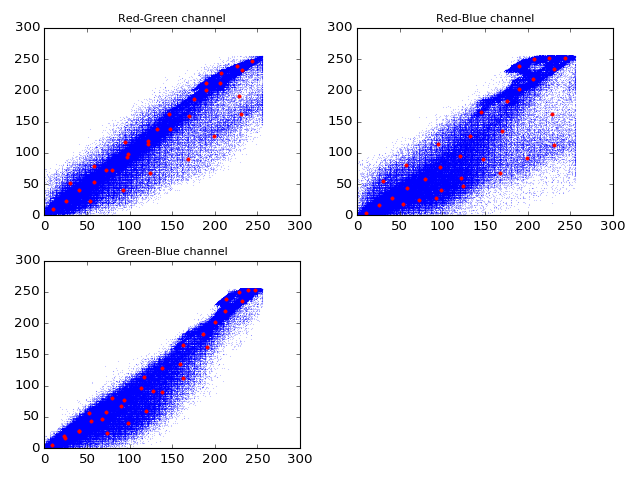

In [8]:
fig = plt.figure(3)
rg = fig.add_subplot(2,2,1)
rb = fig.add_subplot(2,2,2)
gb = fig.add_subplot(2,2,3)

rg.plot(iso[:,0], iso[:,1], 'b.', markersize=1, alpha=0.2)
rg.set_title('Red-Green channel', fontsize=10)
rb.plot(iso[:,0], iso[:,2], 'b.', markersize=1, alpha=0.2)
rb.set_title('Red-Blue channel', fontsize=10)
gb.plot(iso[:,1], iso[:,2], 'b.', markersize=1, alpha=0.2)
gb.set_title('Green-Blue channel', fontsize=10)

rg.plot(colors[:,0], colors[:,1], 'r.')
rb.plot(colors[:,0], colors[:,2], 'r.')
gb.plot(colors[:,1], colors[:,2], 'r.')

fig.tight_layout()

<IPython.core.display.Javascript object>


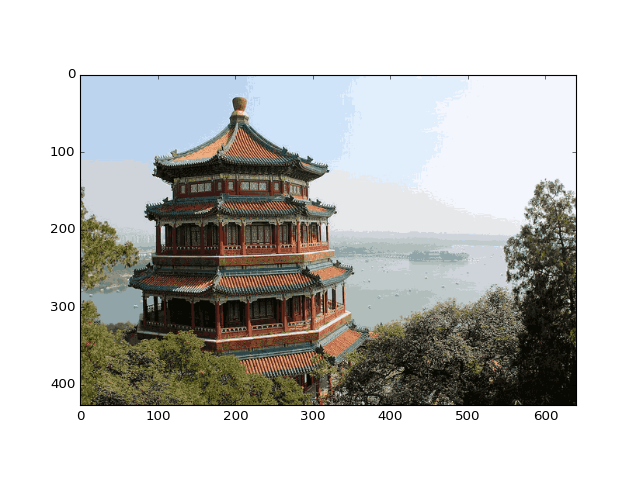

In [6]:
new_image = colors[labels].reshape(china.shape).astype(np.uint8)
fig = plt.figure(4)
ax = fig.add_subplot(1,1,1)
ax.imshow(new_image)